# Import stuff 


In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

path = '/Users/alessiogandelli/dev/uni/reddit-disagreement/data/data-tidy/user_nodelist_per_post.csv'

df_full = pd.read_csv(path)
print(len(df_full))

4437911


# cleaning and preparation

since we are interested in the votes per users, we first drop the users that do not have any flairs, thus never voted

In [2]:
df = df_full.dropna(subset=['flairs'])
df['flairs'] = df['flairs'].astype(str)
print(len(df))


2955006


/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_58973/779375496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flairs'] = df['flairs'].astype(str)


the unstructured column flairs contains a list of votes the users expressed, we will extract the votes and create a new column for each vote, also a n_comments and n_votes columns are created

In [3]:
df.loc[:, 'n_comments'] = df['flairs'].apply(lambda x: len(x.split(',')))
df.loc[:, 'n_votes'] = df['flairs'].apply(lambda x: len(set([i for i in x.split(',') if i.strip() != ''])))# %%

df.loc[:, 'NTA_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'NTA']))
df.loc[:, 'YTA_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'YTA']))
df.loc[:, 'ESH_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'ESH']))
df.loc[:, 'NAH_votes'] = df['flairs'].apply(lambda x: len([i for i in x.split(',') if i.strip() == 'NAH']))


/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_58973/1082776831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'n_comments'] = df['flairs'].apply(lambda x: len(x.split(',')))
/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_58973/1082776831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'n_votes'] = df['flairs'].apply(lambda x: len(set([i for i in x.split(',') if i.strip() != ''])))# %%
/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_58973/10827

# Exploring the data

let's see the users that expressed more than one vote per post

In [4]:
df[df['n_votes'] > 1].sort_values('n_votes', ascending=False)


,author,entering_time,post,flairs,n_comments,n_votes,NTA_votes,YTA_votes,ESH_votes,NAH_votes
3811324,SquirmyBurrito,2019-09-30 16:16:27,db9dtn,"NTA, YTA, , , NTA, , , , , , , , , , , , , NAH...",40,4,2,1,0,1
4355578,GroundhogNight,2020-01-02 17:57:51,eizcvf,"YTA, , , , , , , , , , NTA, , , , , , , , , , ...",82,4,1,4,1,0
4179577,jjaekkak,2019-08-06 20:54:11,cmvrbe,", , , YTA, , , , , , NAH, , , , , ESH, , , , ,...",26,4,1,1,1,1
1453734,Creepy_Tumbleweed_98,2022-10-17 02:17:54,y5u968,"YTA, , , , , , , NAH, NTA, , , , , NTA, , , , ...",32,4,3,2,0,1
1737670,Purple-Raven1991,2022-09-24 03:50:56,xll1dz,"ESH, , , , , ESH, , , , , , , , , ESH, , , NAH...",34,4,1,0,3,2
...,...,...,...,...,...,...,...,...,...,...
1281480,poptartt992,2023-07-18 18:15:12,152x6q5,"YTA, YTA",2,2,0,2,0,0
1281362,mikkimon,2023-07-18 14:52:52,152x6q5,"YTA, YTA, YTA",3,2,0,3,0,0
1281341,matchalover,2023-07-18 17:23:08,152x6q5,"YTA, YTA, , ,",5,2,0,2,0,0
1281194,inFinEgan,2023-07-18 15:33:52,152x6q5,"YTA, YTA",2,2,0,2,0,0


more interesting is the users that exmpressed more than one vote per post and the votes are different

In [6]:
df['vote_types'] = (df[['NTA_votes', 'YTA_votes', 'ESH_votes', 'NAH_votes']] > 0).sum(axis=1)
df_filtered = df[df['vote_types'] >= 2]
df_filtered

/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_58973/3366658544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_types'] = (df[['NTA_votes', 'YTA_votes', 'ESH_votes', 'NAH_votes']] > 0).sum(axis=1)


,author,entering_time,post,flairs,n_comments,n_votes,NTA_votes,YTA_votes,ESH_votes,NAH_votes,vote_types
277,Excuse_my_GRAMMER,2022-12-22 15:27:45,zsf4iq,"YTA, NAH, , ,",5,2,0,1,0,1,2
1083,embopbopbopdoowop,2022-12-22 07:17:41,zsf4iq,"NTA, ESH",2,2,1,0,1,0,2
2342,BabbleAli,2022-12-16 19:07:42,znl39u,"NTA, YTA",2,2,1,1,0,0,2
2473,CeoNephele,2022-12-16 21:22:57,znl39u,"NTA, NAH, ,",4,2,1,0,0,1,2
6399,Mindless-String2294,2022-12-13 02:32:42,zkaxz0,"YTA, NTA,",3,2,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
4431304,JayConz,2019-03-03 21:03:03,awyi8k,"NTA, NAH, , , NAH",5,2,1,0,0,2,2
4431813,UmbralApocrypha,2019-03-04 03:45:32,awyi8k,"YTA, , NTA,",4,2,1,1,0,0,2
4433041,AllMyNameIdeasSuck,2023-01-12 06:07:28,109i1ro,"NTA, NAH",2,2,1,0,0,1,2
4433258,BlueMANAHat,2023-01-12 03:43:40,109i1ro,"NTA, , YTA, , , , ,",8,2,1,1,0,0,2


this instead are the number of users that voted multiple votes 

In [5]:
df_filtered.groupby('post').count().sort_values('author', ascending=False)['author'].head(10)

NameError: name 'df_filtered' is not defined

In [33]:
df_grouped = df_filtered.groupby('post').agg({'author': ['count']})
df_grouped.columns = ['author_count']
df_grouped = df_grouped.sort_values('author_count', ascending=False)
df_grouped['percentage'] = (df_grouped['author_count'] / df_grouped['author_count'].sum()) * 100
df_grouped.head(10)

,author_count,percentage
post,,
ydcy8i,25,0.533960
yxrq30,20,0.427168
1499qbf,18,0.384451
16lqhmp,17,0.363093
z7xtan,17,0.363093
cm0bft,17,0.363093
102ge2y,15,0.320376
zalhix,15,0.320376
eizcvf,15,0.320376


<Axes: ylabel='Frequency'>

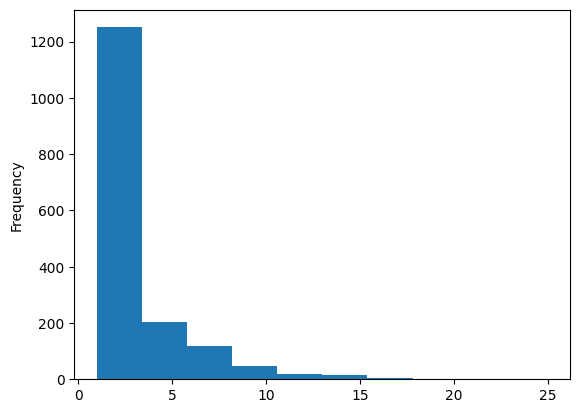

In [28]:
df_filtered.groupby('post').count().sort_values('author', ascending=False)['author'].plot(kind='hist', bins=10)

# User distrubution


In [50]:
# count the users for each post 
df_grouped = df_full.groupby('post').agg({'author': ['count']})
df_grouped_confuse = df_filtered.groupby('post').agg({'author': ['count']})

# rename the columns
df_grouped.columns = ['author_count']
df_grouped_confuse.columns = ['author_count_confuse']

# merge the two dataframes
df_grouped = df_grouped.merge(df_grouped_confuse, left_index=True, right_index=True, how='left')

df_grouped['percentage'] = (df_grouped['author_count_confuse'] / df_grouped['author_count']) * 100

df_grouped = df_grouped.dropna(subset=['percentage'])

In [52]:
df_grouped.sort_values('percentage', ascending=False).head(10)

,author_count,author_count_confuse,percentage
post,,,
1785tey,13,2.0,15.384615
16t8mqd,7,1.0,14.285714
16sg0vj,7,1.0,14.285714
1790ee7,8,1.0,12.500000
17a43qz,9,1.0,11.111111
16kw2h3,9,1.0,11.111111
16nf83a,9,1.0,11.111111
16zkgi2,9,1.0,11.111111
16nmuxr,12,1.0,8.333333


<Axes: xlabel='author_count', ylabel='author_count_confuse'>

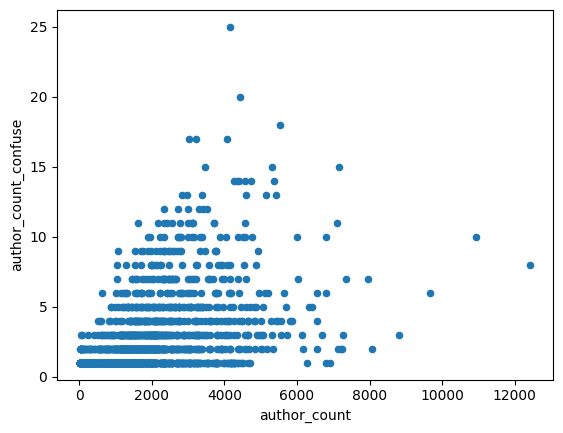

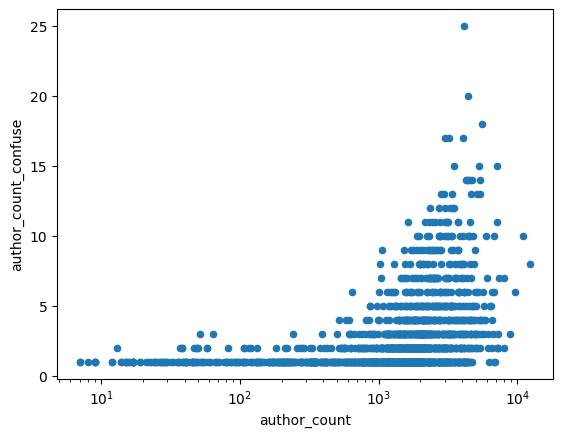

In [70]:
df_grouped.sort_values('author_count_confuse', ascending=False).plot(kind='scatter', x='author_count', y='author_count_confuse')

# same plot but with log log 
df_grouped.sort_values('author_count_confuse', ascending=False).plot(kind='scatter', x='author_count', y='author_count_confuse', logx=True, logy=False)

# a violin plot but x is log 

/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_27519/155955869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['log_author_count'] = np.log(df_grouped['author_count'])


<Axes: xlabel='author_count', ylabel='author_count_confuse'>

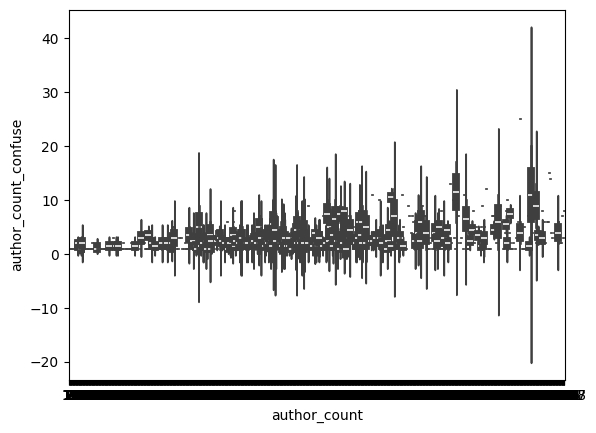

In [76]:
import numpy as np

df_grouped['log_author_count'] = np.log(df_grouped['author_count'])
sns.violinplot(data=df_grouped, x='author_count', y='author_count_confuse')

<Axes: ylabel='Frequency'>

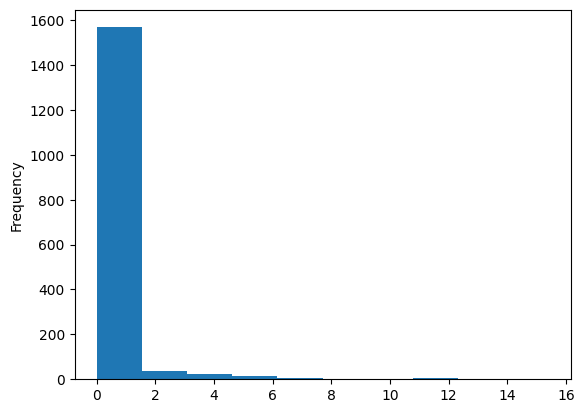

In [78]:
# histogram of the percentage of confused users
df_grouped['percentage'].plot(kind='hist', bins=10)

,author_count,author_count_confuse,percentage,log_author_count
post,,,,
10020p0,1652,1.0,0.060533,7.409742
100rli7,2270,5.0,0.220264,7.727535
1013kys,1696,2.0,0.117925,7.436028
1028xx9,3745,6.0,0.160214,8.228177
102ge2y,3473,15.0,0.431903,8.152774
...,...,...,...,...
zyrhm8,3169,7.0,0.220890,8.061171
zz3u09,3963,1.0,0.025233,8.284757
zz5str,1810,1.0,0.055249,7.501082
